確率変数：値が確率的に変動するような変数

標本統計量（標本の平均や分散、標準偏差など）も、確率的に変動する確率変数

In [45]:
from scipy.stats import binom, poisson, geom, expon, norm
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#二項分布 P(x)：ある事象が起こる確率pの試行を、n回実施して、その事象がx回起きる確率

#n=3, p=1/6:3回試行して、1/6の確率で起こる事象がx回起こる確率の分布
#sample=2160:サイコロを3回振ることを2160回するという意味
data_binom = binom.rvs(n=3, p=1/6, size=2160)
data_binom

array([0, 0, 2, ..., 1, 0, 0])

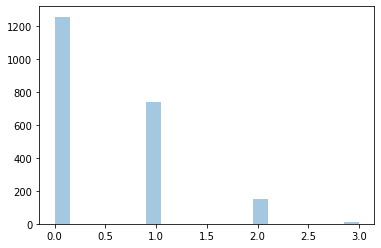

In [7]:
sns.distplot(data_binom, kde=False)

In [28]:
#ポワソン分布：ある時間に平均μ回起こる事象が、その時間内にx回起こる確率
#実世界の問題に応用できることが多い
#時間だけでなく、滅多に起きない事象を扱うときに向いている
mu = 30
k = 40
#scipyのポワソン分布
p1 = poisson.pmf(k=k, mu=mu)
#ポワソンの式を普通に求めてみる
p2 = (mu**k * np.e**(-mu)) / math.factorial(k)
print(p1, p2)

0.013943463479967897 0.013943463479967761


Text(0, 0.5, 'probablity')

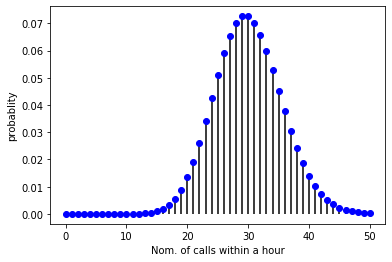

In [29]:
x = np.arange(51)
plt.plot(x, poisson.pmf(k=x, mu=mu), 'bo')
plt.vlines(x, 0, poisson.pmf(k=x, mu=mu))
plt.xlabel('Nom. of calls within a hour')
plt.ylabel('probablity')

In [32]:
#上の分布で２０〜４０の範囲に入る確率
probablity = np.sum(poisson.pmf(k=x, mu=mu)[20:41])
probablity

0.9458169573927407

Text(0, 0.5, 'probablity')

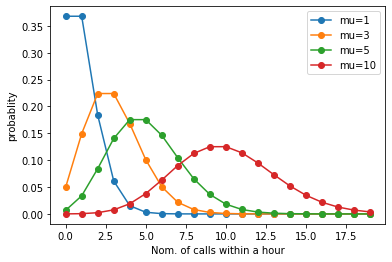

In [33]:
#muを変化させることで正規分布に近づく
x = np.arange(20)
mu_list = [1, 3, 5, 10]

for idx, mu in enumerate(mu_list):
    plt.plot(x, poisson.pmf(k=x, mu=mu), 'o-', label='mu={}'.format(mu))
    
plt.legend()
plt.xlabel('Nom. of calls within a hour')
plt.ylabel('probablity')

In [34]:
#幾何分布：確率pで起こる事象が、初めて観察されるまでの試行回数xの確率、離散的待ち時間分布
#指数分布：幾何分布の連続確率バージョン
#       ある時間内に平均λ回起こる事象が次に起こるまでがx単位時間である確率

Text(0, 0.5, 'probablity')

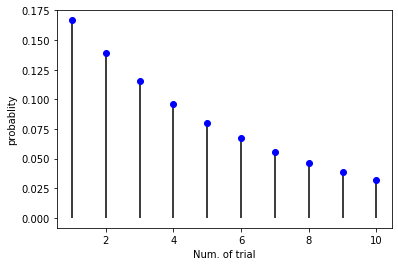

In [36]:
x = np.arange(1, 11)
y = geom.pmf(k=x, p=1/6)
plt.plot(x, y, 'bo')
plt.vlines(x, 0, y)
plt.xlabel('Num. of trial')
plt.ylabel('probablity')

Text(0, 0.5, 'probablity density')

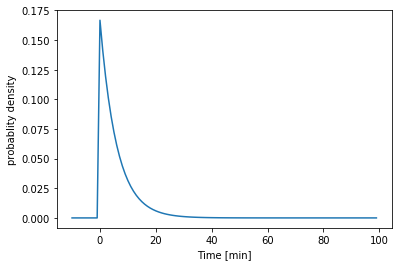

In [39]:
x = np.arange(-10, 100)
y = expon.pdf(x=x, scale=6)
plt.plot(x, y)
plt.xlabel('Time [min]')
plt.ylabel('probablity density')

Text(0, 0.5, 'plobablity')

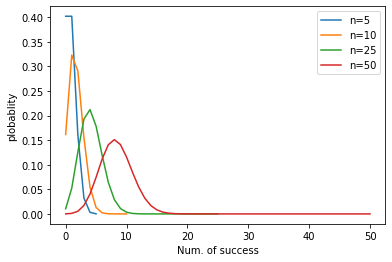

In [44]:
#二項分布は正規分布に近似していく
n_list = [5, 10, 25, 50] #->50
p = 1/6

for n in n_list:
    x = np.arange(n+1)
    y = binom.pmf(k=x, p=p, n=n)
    plt.plot(x, y, label='n={}'.format(n))

plt.legend()
plt.xlabel('Num. of success')
plt.ylabel('plobablity')

Text(0, 0.5, 'probablity density')

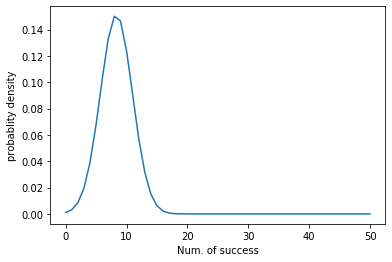

In [46]:
#正規分布
n = 50
mu = n * p
std = np.sqrt(n *p *(1-p))
x = np.arange(n+1)
y = norm.pdf(x=x, loc=mu, scale=std)

plt.plot(x, y)
plt.xlabel('Num. of success')
plt.ylabel('probablity density')